In [92]:
import numpy as np
import math
import struct
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from hamming import *
from encode import *

%matplotlib inline

## Constants

In [93]:
sample_rate = 1e6

Make sure data is in float32

In [94]:
stuff=np.fromfile('./rx_bits.txt',dtype='float32')
#header=np.fromfile('./header.dat',dtype='float32')
header = generate_white_noise(seed=4)
footer = generate_white_noise(seed=5)

Take real and imaginary parts of complex signal

In [95]:
arr1 = stuff[::2]
arr2 = stuff[1::2]

Make a complex signal

In [96]:
signal=arr1+(1j * arr2 )

Real signal plot

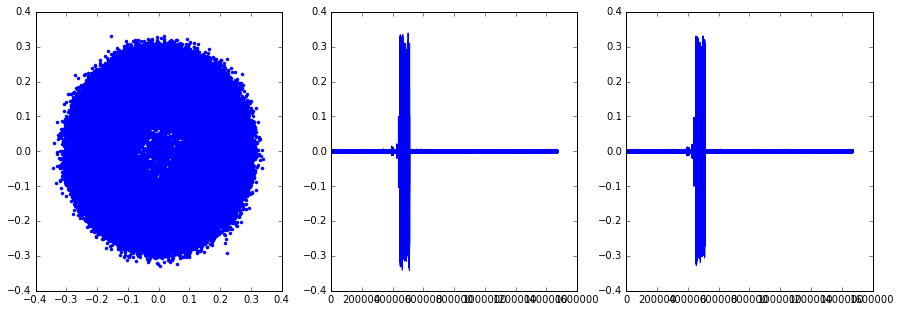

In [97]:
fullPlot(signal)

Calculate the frequency axis of the fft, then calculate the fft of the signal squared. Half of the frequency of the spike is an approximation of the frequency offset.

(170.758496173-64.3717838549j)
start: 449476
end: 506086


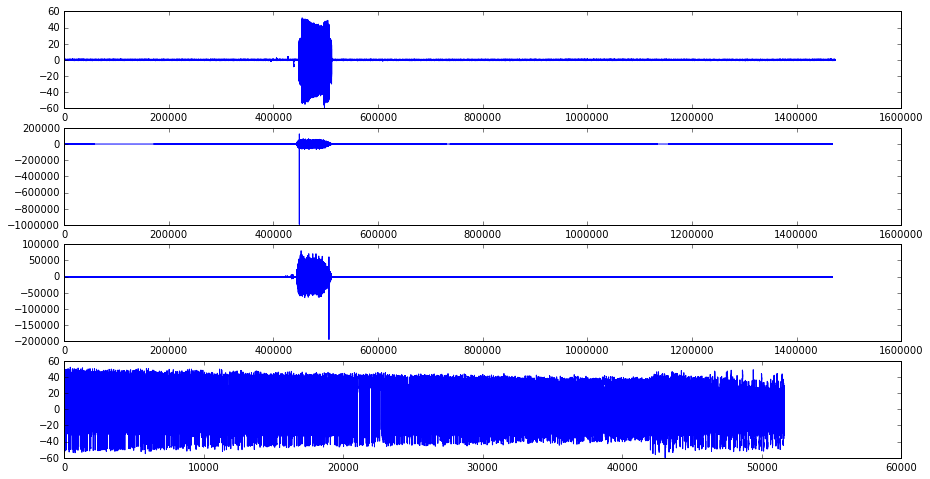

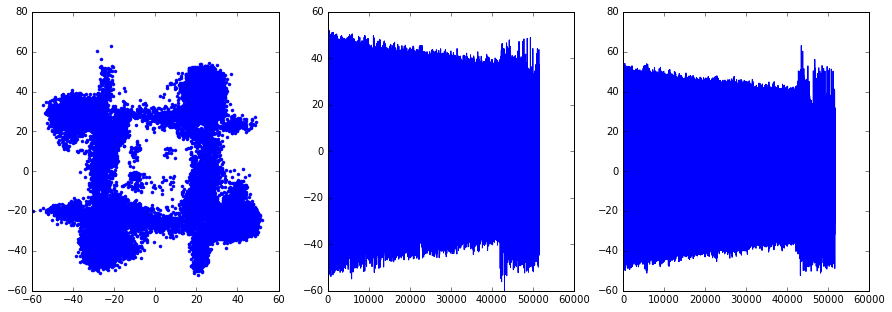

In [98]:
trimmed = autoTrim(signal,header,footer)
fullPlot(trimmed)

### Costas Loop
To correct for phase drift, the Costas loop uses the area of the rectangle formed by our complex vector as an error function. We're not actually using a Costas loop, since we can get a more exact phase correction using nonlinear python operations. 

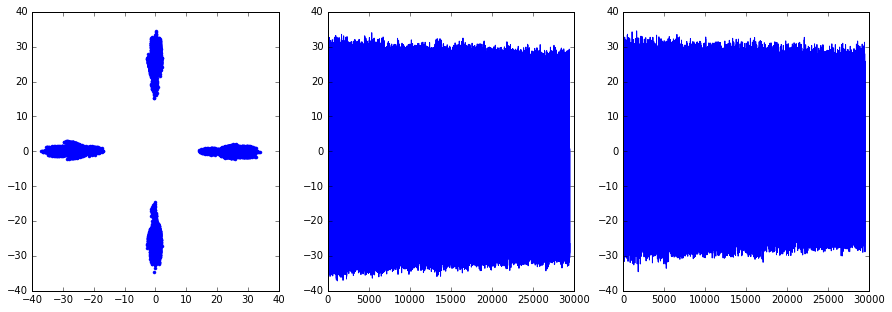

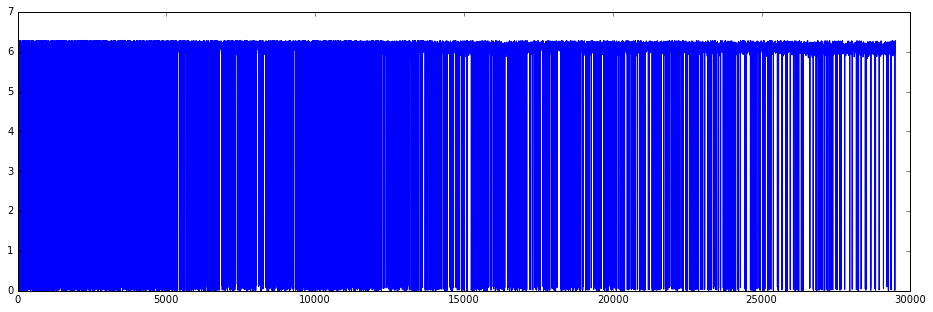

In [88]:
phase_captured, phase_o = phaseCapture(trimmed)
fullPlot(phase_captured)
plt.figure(figsize=(16,5))
plt.plot(phase_o)

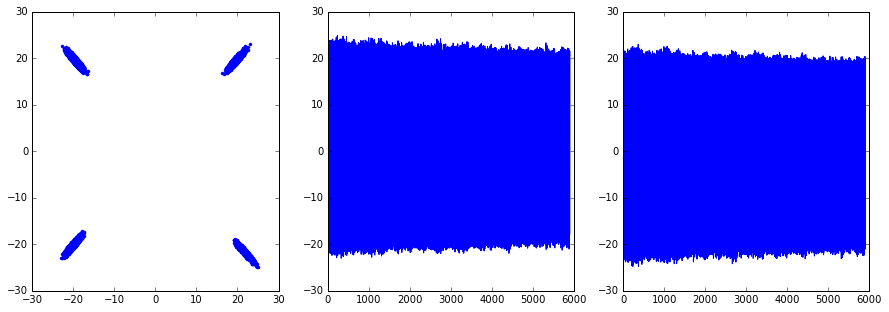

In [89]:
sampled=sample(phase_captured)
res = autoRotate(sampled*np.exp(-1j*np.pi/4))
fullPlot(res)

In [91]:
unHam(list(parse(res,threshold = 0.000001)))

'6Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.\nNow we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.\nBut, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have

In [58]:
parsed = list(parse(res,threshold = 0.000001))

In [59]:
decode_string(list(parsed))

'6Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.\nNow we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.\nBut, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have

In [49]:
expectation=[0, 3, 1, 2, 1, 0, 1, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 0, 3, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 1, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 2, 0, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 0, 3, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 3, 0, 2, 1, 3, 1, 0, 1, 3, 2, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 0, 0, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 3, 3, 1, 3, 0, 3, 1, 2, 2, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 2, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 1, 0, 3, 2, 1, 2, 3, 3, 1, 3, 1, 3, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3, 1, 2, 0, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 2, 3, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 0, 1, 1, 3, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 1, 1, 1, 3, 0, 3, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 2, 0, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 3, 3, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 0, 1, 3, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 3, 2, 0, 2, 0, 0, 1, 1, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 1, 1, 2, 1, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 3, 1, 0, 1, 2, 3, 0, 1, 2, 1, 1, 0, 2, 3, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 0, 1, 1, 3, 0, 2, 0, 2, 3, 2, 0, 2, 0, 0, 1, 1, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 3, 3, 1, 3, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 0, 1, 1, 2, 3, 0, 0, 2, 0, 0, 1, 3, 0, 2, 1, 2, 1, 1, 1, 3, 0, 3, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 3, 0, 1, 2, 0, 1, 1, 2, 0, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 3, 3, 1, 3, 0, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 3, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 3, 1, 0, 1, 2, 3, 3, 1, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 3, 1, 0, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 0, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 2, 0, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 3, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 3, 1, 1, 1, 3, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 0, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 0, 3, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 0, 3, 1, 2, 1, 1, 1, 2, 0, 3, 1, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 3, 1, 3, 1, 3, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 3, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 3, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 2, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 0, 3, 1, 3, 1, 0, 1, 3, 0, 2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 3, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 0, 3, 1, 2, 1, 1, 1, 2, 0, 3, 1, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 3, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 3, 3, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 3, 3, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 3, 3, 1, 3, 1, 3, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 3, 1, 0, 1, 3, 0, 2, 1, 2, 0, 1, 1, 2, 0, 3, 1, 3, 1, 0, 0, 2, 3, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 3, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 1, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 2, 1, 1, 3, 1, 0, 1, 3, 1, 0, 1, 2, 3, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 0, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 3, 3, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 0, 1, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 3, 1, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 3, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 1, 3, 0, 3, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 2, 3, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 2, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 2, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 3, 1, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 2, 0, 2, 1, 2, 3, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 3, 1, 2, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 0, 3, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 3, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 0, 1, 1, 3, 0, 3, 1, 2, 2, 3, 0, 2, 0, 0, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 1, 1, 3, 0, 3, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 3, 0, 2, 1, 2, 3, 3, 1, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 3, 3, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 0, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 0, 3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 0, 3, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 3, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 1, 1, 1, 3, 0, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 3, 1, 2, 2, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 0, 1, 2, 0, 1, 1, 3, 0, 3, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 3, 1, 1, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 0, 3, 1, 3, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 3, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 2, 3, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 3, 0, 2, 1, 2, 1, 1, 1, 3, 0, 3, 1, 2, 3, 3, 1, 2, 3, 0, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 3, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 3, 2, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 0, 1, 3, 1, 2, 3, 3, 1, 2, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 3, 0, 2, 1, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 3, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 3, 3, 1, 2, 3, 1, 0, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 3, 1, 2, 3, 3, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 3, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 1, 1, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 3, 0, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 3, 2, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 1, 1, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 3, 0, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 1, 1, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 3, 0, 1, 2, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 0, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 2, 1, 1, 3, 0, 3, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 3, 0, 2, 1, 2, 3, 3, 1, 2, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 0, 2, 1, 3, 1, 0, 1, 2, 2, 0, 0, 2, 3, 2, 0, 0, 2, 2]

In [50]:
received_bits = parsed
if len(expectation) != len(received_bits):
    print('padding')
    print(len(expectation),len(received_bits))
    expectation = [-1] * np.absolute(len(received_bits)-len(expectation)) + expectation

# print(expectation)
error = [bin(a^b).count("1") for a,b in zip(expectation, received_bits)]
print(error)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [51]:
print(received_bits)

[0, 3, 1, 2, 1, 0, 1, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 0, 3, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 1, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 0, 2, 0, 0, 1, 

In [52]:
print(expectation)

[0, 3, 1, 2, 1, 0, 1, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 0, 3, 1, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 2, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 1, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 0, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 3, 0, 2, 0, 0, 1, 

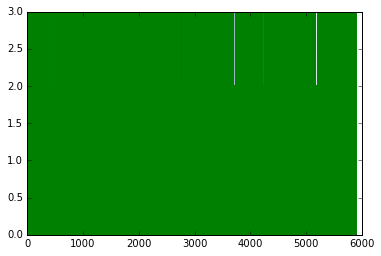

In [53]:
plt.plot(expectation)
plt.plot(received_bits)

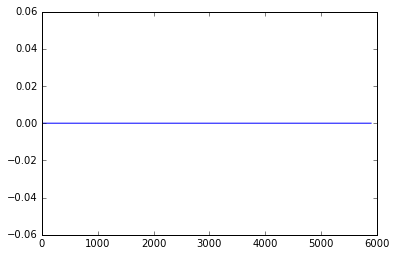

In [54]:
plt.plot(error)

In [341]:
print(error)

[1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 

## Playground

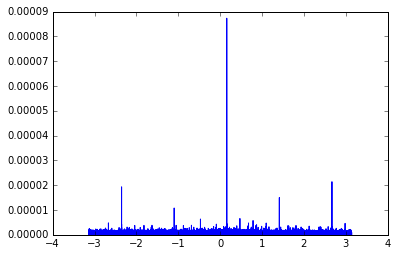

In [340]:
freq_data=np.fft.fftshift(np.fft.fft(signal**4))
freq_axis=np.fft.fftfreq(len(signal),(1/sample_rate))
rad_axis= np.linspace(-np.pi, np.pi*(len(signal)-1)/len(signal), len(freq_data))
plt.plot(rad_axis,np.absolute(freq_data))

In [312]:
freq_offset=np.argmax(freq_data)/4
print("The frequency offset is {:06.2f} hertz".format(freq_axis[np.argmax(freq_data)]/4))
offset = rad_axis[np.argmax(freq_data)]/4
print("The frequency offset is {:06.5f} radians".format(offset))

The frequency offset is -493344.26 hertz
The frequency offset is 0.01045 radians


## Functions

In [6]:
def approxPhaseCorrect(raw_sig,rate=sample_rate,verbose=False):
    """Applies a approximate phase correction to a complex signal, returning the corrected signal"""
    duration = len(raw_sig)
    freq_data = np.fft.fftshift(np.fft.fft(raw_sig**4))
    rad_axis= np.linspace(-np.pi, np.pi*(duration-1)/duration, len(freq_data))
    if verbose:
        pass
    peak = np.argmax(freq_data)
    print(freq_data[peak])
    offset = rad_axis[peak]/4
    correction = -np.exp(-1j*np.linspace(0,duration-1,duration)*offset)
    return raw_sig*correction*freq_data[peak]

def generate_white_noise(seed=None):
    mean = 0
    std = 1
    num_samples = 5000
    np.random.seed(seed)
    samples = np.random.normal(mean, std, size=num_samples)
    header=samples + (1j * samples)
    return header

In [7]:
def argand(signal):
    """Plots an argand diagram of a complex signal"""
    plt.plot(np.real(signal),np.imag(signal), marker='.',linestyle='')
    
def fullPlot(signal):
    """Plots an argand diagram of a complex signal, along with the real and complex components in time"""
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    argand(signal)
    
    plt.subplot(132)
    plt.plot(np.real(signal))
    
    plt.subplot(133)
    plt.plot(np.imag(signal))
    
    plt.show()

In [86]:
def autoTrim(raw_signal, header, footer):
    signal = approxPhaseCorrect(raw_signal)
    header_corr = np.correlate(signal, header, mode="valid")
    footer_corr = np.correlate(signal, footer, mode="valid")
    start_time = np.argmax(np.absolute(header_corr))
    end_time = np.argmax(np.absolute(footer_corr))
    trimmed = signal[start_time+len(header):end_time]
    
    plt.figure(figsize=(15,8))
    plt.subplot(411)
    plt.plot(np.real(signal))
    plt.subplot(412)
    plt.plot(np.real(header_corr))
    plt.subplot(413)
    plt.plot(np.real(footer_corr))
    plt.subplot(414)
    plt.plot(np.real(trimmed))

    print("start: {}".format(start_time))
    print("end: {}".format(end_time))
    
    return trimmed

In [9]:
def parse(signal, threshold=0.001):
    for sample in signal:
        if np.absolute(np.real(sample))+np.absolute(np.imag(sample)) < threshold:
            yield(-1)
            continue
        if np.real(sample) < 0:
            if np.imag(sample) < 0:
                yield(0)
            else:
                yield(1)
        else:
            if np.imag(sample) < 0:
                yield(2)
            else:
                yield(3)

In [10]:
def sample(signal, offset=1, bucket=2, period=5):
    length = len(signal)
    num_pads = int(period * np.ceil(length/period))-length
#     pads = (int(np.floor(num_pads/2)), int(np.ceil(num_pads/2)))
    signal_padded = np.pad(signal, (0,num_pads), 'constant', constant_values=np.NaN)
    signal_reshaped = np.reshape(signal_padded, (-1, period))
    signal_sliced = signal_reshaped[:, range(offset, offset+bucket+1)]
    signal_mean = np.nanmean(signal_sliced, axis=1)
    return signal_mean

In [11]:
def phaseCapture(signal):
    phase_captured = []
    phase_offset_t = []
    phase_offset = 0
    corrected_sample = 0
    avg_mag = np.mean([np.absolute(p) for p in signal])
    measured_offset = 0
    
    for point in signal:
        if np.absolute(point) > 0.25 * avg_mag:
            # apply previous correction factor
            corrected_sample = point * np.exp(-1j*phase_offset)

            received_angle = np.angle(corrected_sample) # range from -pi to pi
            received_angle += 2 * np.pi # Correct to range of 0 to 2 pi

            #calculate multiples of pi/2 the received was offset from 0
            num_quadrants = np.floor((received_angle + np.pi / 4) / (np.pi / 2) )
            original_angle = np.pi * num_quadrants / 2

            #calculate received angle offset from intended angle
            measured_offset = received_angle - original_angle
            
        # add forgetting factor
        phase_offset = phase_offset + 0.8 * measured_offset
        
        # wrap phase_offset from 0 to -2 pi
        while (phase_offset > 2 * np.pi):
            phase_offset = phase_offset - 2 * np.pi
        while (phase_offset < 0):
            phase_offset = phase_offset + 2 * np.pi

        #apply final correction factor and output
        phase_captured.append(point * np.exp(-1j*phase_offset))
        phase_offset_t.append(phase_offset)
    
    return phase_captured, phase_offset_t

In [12]:
def decode_string(quad_arr):
    if len(quad_arr) % 4 != 0: return 'ERR'
    idx = 0
    curr_ord = 0
    output_string = ''
    shift = 0
    for symbol in quad_arr:
        curr_ord += symbol << (3-shift)*2
        shift = (shift + 1) % 4
        if shift == 0:
            try:
                output_string += (chr(curr_ord))
            except ValueError:
                output_string += 'FUCK'
            curr_ord = 0
    return output_string

In [13]:
def autoRotate(signal, header=None):
    """Automatically rotates a sampled signal to match a given header. Raises an error if not."""
    if header==None:
        header = [0,3,1,2]
    lowest = 100 
    best = None
    check = signal[:len(header)]
    
    for x in [1, 1j, -1, -1j]: #rotations
        tmp = sum([bin(a^b).count("1") for a,b in zip(parse(check * x), header)])
        if tmp < lowest:
            best = x
            lowest = tmp
        
    if lowest != 0:
        print("Probably errors..")
    return signal*best
    

In [78]:
def unHam(signal):
    rx = np.array(decode_bit_stream(signal)).flatten()
    #     errors = hamming_error_check(rx)
    #     err_tmp = calcerror(errors).flatten()
    #     rx_corrected = hamming_correct(rx, err_tmp).flatten()
    #     bits_decode = hamming_decode(rx_corrected).flatten()


    #     return frombits(bits_decode)
    return frombits(rx)